In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

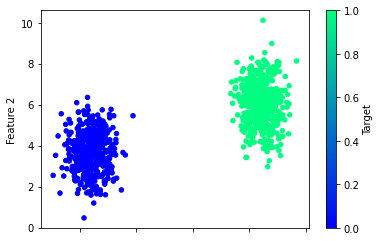

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer

#input_dim - how many inputs there will be
#units - how many neurons we want in the hidden layer
#activation - which activation function to use (ReLU)
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
#units =1 because this is a classification output
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
#epoch = complete pass through the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6772 - accuracy: 0.7067
Epoch 2/100
24/24 [==============================] - 0s 867us/step - loss: 0.6692 - accuracy: 0.7880
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.8533
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6468 - accuracy: 0.9053
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6333 - accuracy: 0.9493
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6192 - accuracy: 0.9707
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6048 - accuracy: 0.9853
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5897 - accuracy: 0.9947
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5746 - accuracy: 0.9973
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5592 - accuracy: 1.0000
Epoch 1

24/24 [==============================] - 0s 896us/step - loss: 0.0973 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0957 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - ETA: 0s - loss: 0.0808 - accuracy: 1.00 - 0s 927us/step - loss: 0.0941 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0926 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 906us/step - loss: 0.0911 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0896 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 931us/step - loss: 0.0882 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0867 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 921us/step - loss: 0.0854 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - ETA: 0s

<AxesSubplot:>

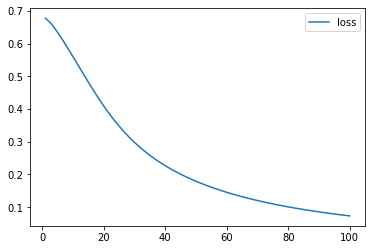

In [11]:
#Visualize the model's loss over the 100 epochs
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

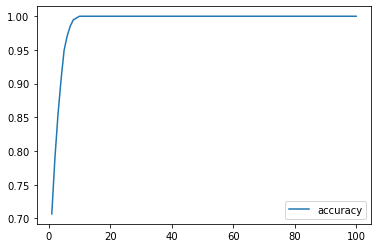

In [12]:
#Visualize the accuracy over the 100 epochs
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0745 - accuracy: 1.0000
Loss: 0.07452000677585602, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])